# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**
A continuación, detallamos las fases de nuestro EDA, las cuales nos permitirán profundizar en el entendimiento de las bases de datos ya preprocesadas:

  * **Chequeo de Nulos/Valores Faltantes:** Verificaremos la presencia de valores nulos restantes. 
  * **Valores Duplicados:** Revisaremos y manejaremos cualquier duplicidad adicional en los datos. 
  * **Tipos de Datos:** Confirmaremos que cada columna contiene el tipo de dato más adecuado para su contenido. 
  * **Análisis Estadístico:** Realizaremos una evaluación estadística para comprender las tendencias y patrones subyacentes. 
  * **Correlaciones:** Analizaremos las relaciones bi y multivariadas para descubrir correlaciones significativas entre las variables. 

Es importante mencionar que, previamente, hemos llevado a cabo una limpieza exhaustiva de las bases de datos que involucra la eliminación de columnas innecesarias, corrección de nulos y remoción de registros duplicados. Este proceso es fundamental para la integridad de las funciones que desarrollaremos a continuación y la creación de la API.

**Importación de librerías**

In [103]:
# Importación de librerías para manipulación de datos
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)  # Permite visualizar todas las columnas en el DataFrame

# Importación de librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración para ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

**Extracción de los datos**
Para los análisis necesarios, extraeremos los datos esenciales de los conjuntos steam_games, user_reviews, y user_items. Estos conjuntos de datos son fundamentales para nuestros análisis.

In [104]:
# Carga de datos de juegos de Steam
steam_games = pd.read_csv('data/steam_games_cleaned.csv')

# Carga de datos de reseñas de usuarios
user_reviews = pd.read_csv('data/user_reviews_cleaned.csv')

# Carga de datos de artículos de usuarios
user_items = pd.read_csv('data/user_items_cleaned.csv')

## **Análisis Exploratorio de Datos (EDA) del Conjunto "Steam Games"**

Tras completar los procesos de Extracción, Transformación y Carga (ETL), nos enfocamos en el EDA del conjunto "Steam Games". Nuestro análisis se concentra en:

Estructura del Conjunto de Datos: Evaluación de su organización y esquema.
Examen de los Datos: Análisis del tipo y distribución de los datos.
Valores Nulos: Identificación y análisis de la presencia de nulos.
Este enfoque garantiza un análisis profundo y preciso, esencial para obtener insights valiosos del conjunto "Steam Games".

**Exploramos los datos**

In [105]:
#Revisamos la data
steam_games

,item_id,app_name,genres,year_of_release,publisher,developer
0,761140.0,Lost Summoner Kitty,Action,2018.0,Kotoshiro,Kotoshiro
1,761140.0,Lost Summoner Kitty,Casual,2018.0,Kotoshiro,Kotoshiro
2,761140.0,Lost Summoner Kitty,Indie,2018.0,Kotoshiro,Kotoshiro
3,761140.0,Lost Summoner Kitty,Simulation,2018.0,Kotoshiro,Kotoshiro
4,761140.0,Lost Summoner Kitty,Strategy,2018.0,Kotoshiro,Kotoshiro
...,...,...,...,...,...,...
74831,610660.0,Russian Roads,Racing,2018.0,Laush Studio,Laush Dmitriy Sergeevich
74832,610660.0,Russian Roads,Simulation,2018.0,Laush Studio,Laush Dmitriy Sergeevich
74833,658870.0,EXIT 2 - Directions,Casual,2017.0,SIXNAILS,"xropi,stev3ns"
74834,658870.0,EXIT 2 - Directions,Indie,2017.0,SIXNAILS,"xropi,stev3ns"


In [106]:
#Revisamos las columnas, el tipo de datos y valores faltantes
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74836 entries, 0 to 74835
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74834 non-null  float64
 1   app_name         74836 non-null  object 
 2   genres           71554 non-null  object 
 3   year_of_release  74836 non-null  float64
 4   publisher        59198 non-null  object 
 5   developer        71360 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.4+ MB


In [107]:
# Convertir la columna 'year_of_release' a enteros
steam_games['year_of_release'] = steam_games['year_of_release'].astype(int)

**Análisis del DataFrame "Steam Games"**

Podemos observar que el DataFrame "Steam Games" contiene 74,837 filas y 6 columnas. Aquí están mis observaciones y conclusiones clave:

**Observaciones Claves**
* **Complejidad de Datos:** El DataFrame incluye tanto datos numéricos (`float64`) como textuales (`object`).
* **Presencia de Valores Nulos:** Algunas columnas clave como  `genres`, `publisher`, y `developer` presentan una cantidad notable de valores nulos.

**Conclusiones**
**a. Revisión de Datos Nulos:** Es esencial abordar los valores nulos, especialmente en las columnas mencionadas, para asegurar la integridad del análisis. 
**b. Análisis Temporal:** La columna `year_of_release` está completa, lo cual facilita análisis basados en la temporalidad de los datos. Sin embargo, será necesario convertirla en entero a la hora de hacer las funciones.
**c. Gestión de Memoria:** Con un uso de 3.4 MB, el DataFrame es manejable y no representa un desafío en términos de recursos computacionales. 

En resumen, mi próximo paso será centrarme en la revisión de los datos, lo que permitirá un análisis más profundo y fiable del conjunto de datos "Steam Games".

**Revisión de Datos Nulos**

In [108]:
steam_games.isnull().sum()

item_id                2
app_name               0
genres              3282
year_of_release        0
publisher          15638
developer           3476
dtype: int64

**Vamos a trabajar los valores nulos de item_id, genres y publisher**

In [109]:
#Inicio un archivo con las columnas que tengo que reemplazar nulos
archivo_columnas=["item_id", "genres","publisher","developer"]

#Genero un dataframe con las columnas y sus nulos reemplazados por "Sin Datos"
nulos= steam_games[archivo_columnas].fillna("Sin Datos")

#Elimino las colummas a reemplazar y concateno ambos dataframes 
games_2 = pd.concat([steam_games.drop(archivo_columnas, axis=1), nulos], axis=1)
games_2

,app_name,year_of_release,item_id,genres,publisher,developer
0,Lost Summoner Kitty,2018,761140.0,Action,Kotoshiro,Kotoshiro
1,Lost Summoner Kitty,2018,761140.0,Casual,Kotoshiro,Kotoshiro
2,Lost Summoner Kitty,2018,761140.0,Indie,Kotoshiro,Kotoshiro
3,Lost Summoner Kitty,2018,761140.0,Simulation,Kotoshiro,Kotoshiro
4,Lost Summoner Kitty,2018,761140.0,Strategy,Kotoshiro,Kotoshiro
...,...,...,...,...,...,...
74831,Russian Roads,2018,610660.0,Racing,Laush Studio,Laush Dmitriy Sergeevich
74832,Russian Roads,2018,610660.0,Simulation,Laush Studio,Laush Dmitriy Sergeevich
74833,EXIT 2 - Directions,2017,658870.0,Casual,SIXNAILS,"xropi,stev3ns"
74834,EXIT 2 - Directions,2017,658870.0,Indie,SIXNAILS,"xropi,stev3ns"


In [110]:
#Confirmamos que ya no tenemos datos nulos
games_2.isnull().sum()

app_name           0
year_of_release    0
item_id            0
genres             0
publisher          0
developer          0
dtype: int64

**Datos duplicados**

In [111]:
# Verificar duplicados, incluyendo la primera ocurrencia
duplicados = games_2.duplicated(keep=False)

# Mostrar todas las filas que están duplicadas
filas_duplicadas = games_2[duplicados]

In [112]:
filas_duplicadas

,app_name,year_of_release,item_id,genres,publisher,developer
32519,Wolfenstein II: The New Colossus,2017,612880.0,Action,Bethesda Softworks,Machine Games
34217,Wolfenstein II: The New Colossus,2017,612880.0,Action,Bethesda Softworks,Machine Games


Las filas 32519 y 34217 son idénticas en todas sus columnas, lo que indica que son duplicados. Vamos a eliminar uno de los duplicados para mantener la integridad de los datos y evitar redundancias.

In [113]:
# Eliminar duplicados, manteniendo la primera ocurrencia
games_2.drop_duplicates(inplace=True)

In [114]:
# Verificar duplicados basados en ciertas columnas
duplicados = games_2.duplicated(subset=['app_name', 'year_of_release', 'item_id'], keep=False)

**Análisis estadísticos y correlaciones**

Analízaremos la columna **"app_name"**

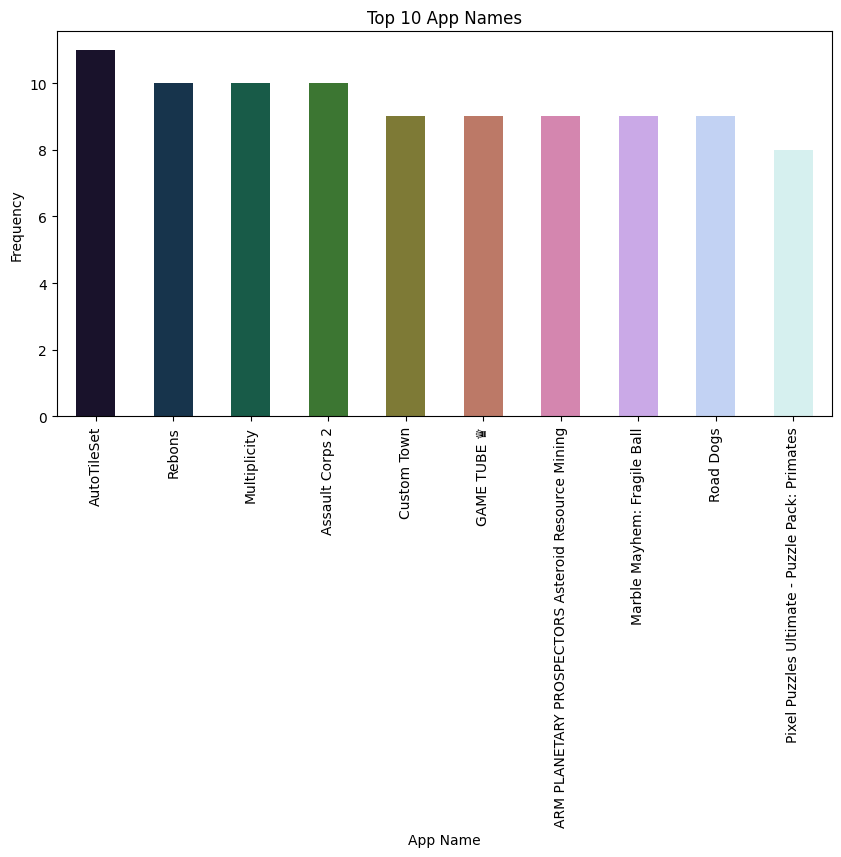

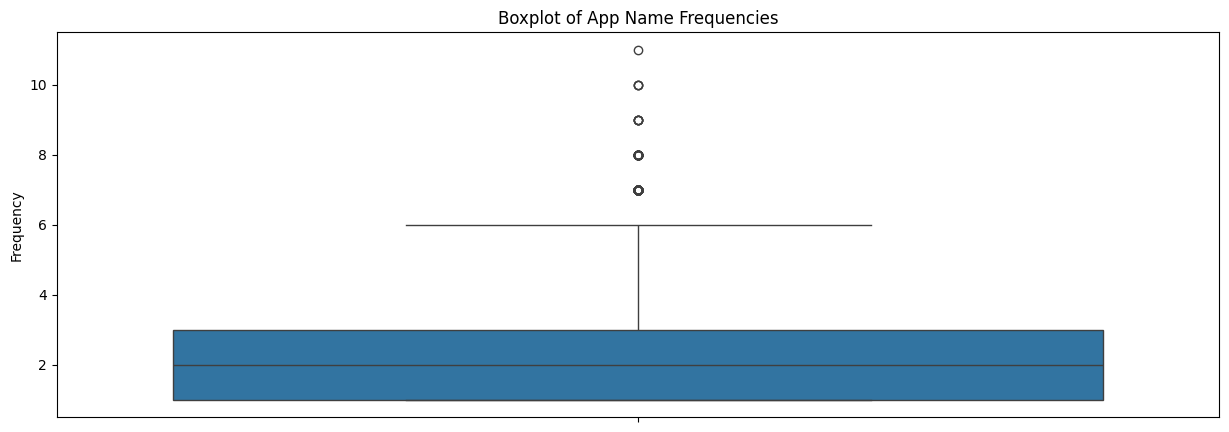

In [115]:
app_names = games_2["app_name"].value_counts()

# Definir los colores utilizando la paleta "cubehelix"
colors = sns.color_palette("cubehelix", len(app_names[:10]))

# Crear el gráfico de barras con los colores especificados para las 10 aplicaciones más comunes
plt.figure(figsize=(10, 5))
app_names[:10].plot(kind='bar', color=colors)
plt.xlabel('App Name')
plt.ylabel('Frequency')
plt.title('Top 10 App Names')
plt.show()

# Para visualizar si hay outliers en la frecuencia de los nombres de las aplicaciones,
# podemos usar un diagrama de caja (boxplot)
plt.figure(figsize=(15, 5))
sns.boxplot(y=app_names)
plt.ylabel('Frequency')
plt.title('Boxplot of App Name Frequencies')
plt.show()

El primer gráfico me muestra el top 10 de nombres de aplicaciones por frecuencia. Observo que todos tienen una frecuencia similar, alrededor de 10 o menos, lo que indica una distribución bastante uniforme entre los más frecuentes. No hay un nombre de aplicación que se destaque significativamente por encima de los demás en este grupo.

El segundo gráfico, un boxplot de las frecuencias de los nombres de las aplicaciones, revela varios puntos por fuera de los "bigotes", que representan outliers. Estos outliers son nombres de aplicaciones que tienen una frecuencia de aparición mucho más alta en comparación con la mayoría. La caja en sí es bastante estrecha, lo que sugiere que la mayoría de las aplicaciones tienen una baja frecuencia de aparición, mientras que unos pocos nombres son mucho más comunes.

Analízaremos la columna **"year_of_release"**

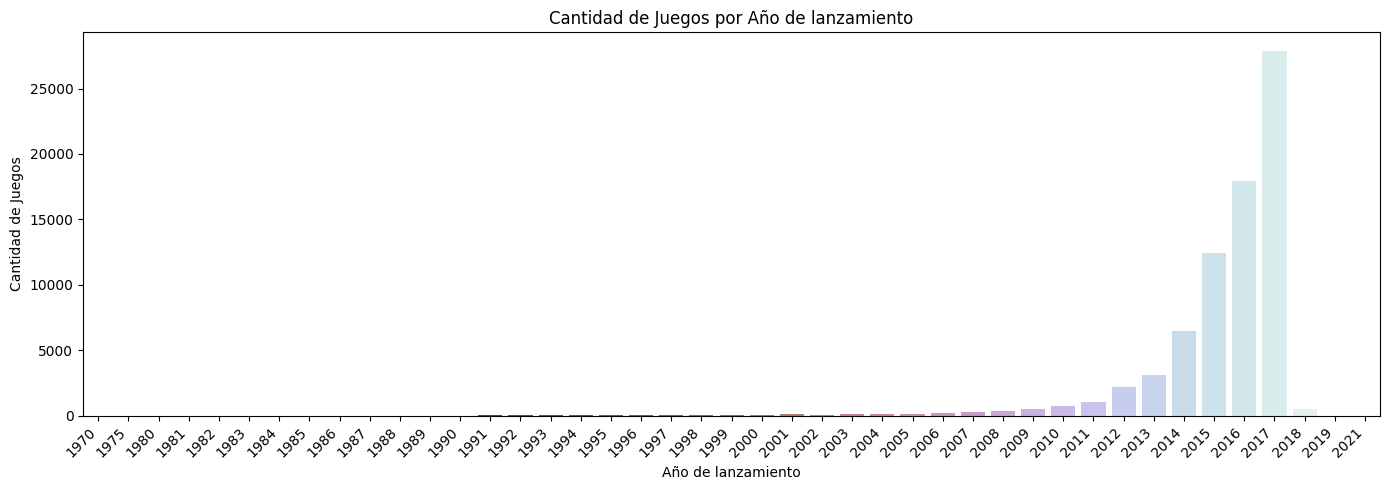

In [116]:
juegos_anios= games_2["year_of_release"].value_counts()
cantidad_juegos_anios= juegos_anios.sort_index()

plt.figure(figsize=(14, 5))

sns.barplot(x=cantidad_juegos_anios.index, y=cantidad_juegos_anios.values, palette=("cubehelix"))
plt.xlabel('Año de lanzamiento') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Cantidad de Juegos por Año de lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



El gráfico muestra la cantidad de juegos lanzados por año, con un claro incremento a lo largo del tiempo. Hay un aumento significativo a partir de 2010, con un pico particularmente alto en 2018. Este pico sobresale de la tendencia general y podría considerarse un outlier, ya que difiere significativamente de los otros valores.

El crecimiento acelerado en los años recientes podría reflejar la expansión del mercado de videojuegos, la facilidad de publicación de juegos independientes o un cambio en la política de la plataforma de distribución que se está analizando.

Si bien un único año con un alto número de lanzamientos podría ser un outlier, también podría ser el resultado de un cambio en la industria o en la metodología de recopilación de datos.

Analízaremos la columna **"Genres"**

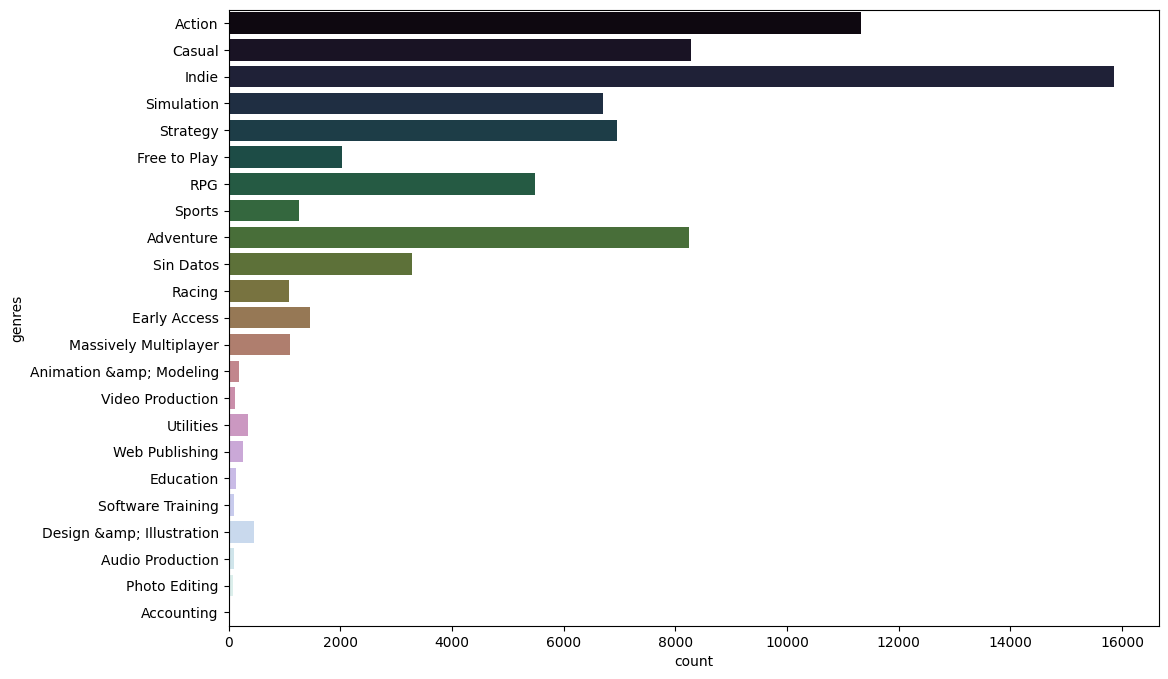

In [117]:
plt.figure(figsize=(12, 8))
sns.countplot(data=games_2, y='genres', orient='h', palette=("cubehelix"))
plt.show()

Mirando este gráfico, podemos ver que los géneros de acción, casual e indie son los más comunes, lo que indica que son muy populares o frecuentemente producidos. En contraste, géneros como contabilidad aparecen poco, mostrando que son más especializados. Este resumen me ayuda a entender qué categorías capturan más interés y cuáles son más de nicho.

Para obtener una comprensión más profunda de la distribución, es beneficioso calcular la proporción que cada género representa en el total. Así que he generado una tabla que exhibe la proporción porcentual de juegos asociados a cada género específico.

In [118]:
# Cálculo de porcentajes por género
genre_percentages = (games_2['genres'].value_counts() / len(games_2)) * 100

# Mostrar los 10 géneros principales con sus porcentajes
top10_genres = genre_percentages.head(10)
top10_genres

genres
Indie           21.190619
Action          15.126612
Casual          11.067014
Adventure       11.014899
Strategy         9.296452
Simulation       8.951694
RPG              7.321441
Sin Datos        4.385648
Free to Play     2.713971
Early Access     1.953631
Name: count, dtype: float64

Estos porcentajes ofrecen una perspectiva interesante sobre la composición del conjunto de datos. Se puede ver que los juegos Indie representan la mayor parte, con un 21.19%, lo que sugiere una fuerte presencia de desarrolladores independientes o una preferencia del consumidor hacia estos juegos. Los juegos de Acción también forman una gran fracción con un 15.13%, seguidos de cerca por los géneros Casual y Aventura, ambos con poco más del 11%.

La Estrategia y la Simulación también tienen una representación significativa, indicando una buena diversidad en los tipos de juegos disponibles. Los RPG están presentes con un 7.32%, lo que podría indicar un nicho sólido para este género.

Es interesante notar que hay un 4.39% de juegos clasificados como 'Sin Datos', lo que podría indicar entradas incompletas en la base de datos o juegos que no encajan bien en las categorías estándar.

Los géneros 'Free to Play' y 'Early Access' tienen los porcentajes más bajos, lo que podría reflejar una menor cantidad de juegos que se ofrecen gratuitamente o que están en etapas de desarrollo tempranas.

En resumen, estos porcentajes me muestran la diversidad del mercado de juegos en mi conjunto de datos y pueden guiar decisiones futuras en cuanto a qué géneros podrían ser más atractivos para desarrollar o invertir.

Analízaremos la columna **"Developers"**

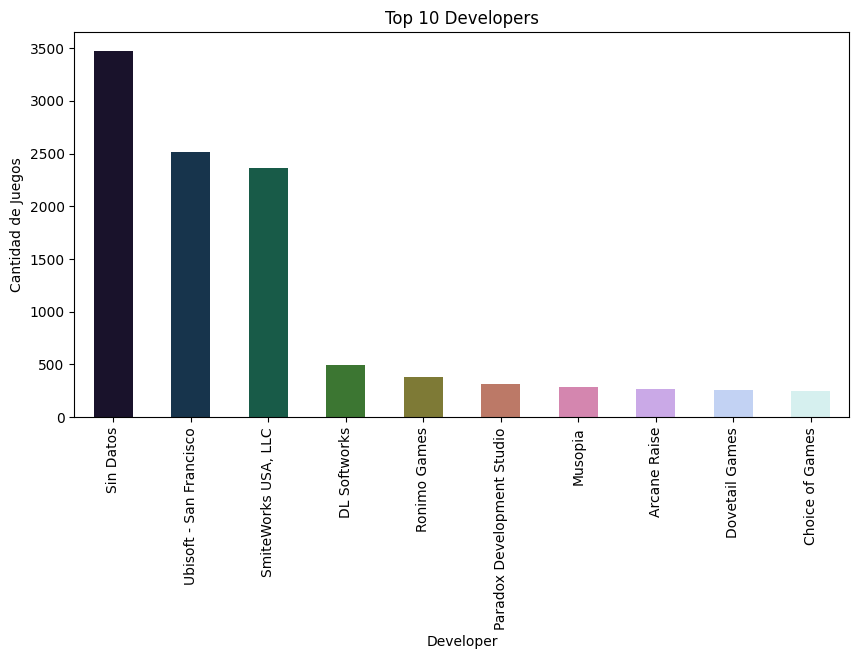

In [119]:
developers = games_2["developer"].value_counts()

# Definir los colores utilizando la paleta "cubehelix"
colors = sns.color_palette("cubehelix", len(developers[:10]))

# Crear el gráfico de barras con los colores especificados
plt.figure(figsize=(10, 5))
developers[:10].plot(kind='bar', color=colors)
plt.xlabel('Developer')
plt.ylabel('Cantidad de Juegos')
plt.title('Top 10 Developers')
plt.show()

En este gráfico vemos la cantidad de juegos desarrollados por los 10 principales desarrolladores. La categoría 'Sin Datos' domina claramente, lo que podría indicar que una gran cantidad de juegos no tienen un desarrollador asignado o registrado en la base de datos. Ubisoft San Francisco y Smileworks USA, LLC le siguen, mostrando una producción significativa.

La categoría 'Sin Datos', sin embargo, podría considerarse un outlier debido a su tamaño desproporcionadamente grande en comparación con los desarrolladores nombrados, pero esto es más probable que sea un artefacto de la recopilación de datos que un verdadero outlier en el sentido tradicional.

Esto sugiere que la mayoría de los juegos en la base de datos están concentrados en un número relativamente pequeño de desarrolladores, con la excepción notable de muchos juegos que no tienen esta información disponible. Esto podría indicar una industria donde algunos desarrolladores grandes dominan en términos de volumen de producción de juegos.

## **Análisis Exploratorio de Datos (EDA) del Conjunto "USER REVIEWS"**

In [120]:
#Revisamos la data
user_items.head(3)

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,Counter-Strike,6,0
1,76561197970982479,277,20,Team Fortress Classic,0,0
2,76561197970982479,277,30,Day of Defeat,7,0


**Revisión de nulos/datos faltantes y tipos de datos**

In [121]:
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
 5   playtime_2weeks   int64 
dtypes: int64(4), object(2)
memory usage: 233.2+ MB


In [122]:
# Convertir la columna 'user_id' a strings
user_items['user_id'] = user_items['user_id'].astype(str)

In [123]:
user_items.isnull().sum()

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

No tenemos ningún dato nulo ya que hicimos la limpieza en el ETL

**Análisis de duplicados**

In [124]:
# Verificar duplicados, incluyendo la primera ocurrencia
duplicados = user_items.duplicated(keep=False)

# Mostrar todas las filas que están duplicadas
filas_duplicadas = user_items[duplicados]

filas_duplicadas

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks


Podemos ver que no hay filas duplicadas, lo cual es muy bueno.

**Análisis estadísticos y correlaciones**

Revisemos la columna items_count

In [125]:
# Filtrar los valores 'Dato no disponible' en 'items_count'
user_items_cleaned = user_items[user_items['items_count'] != 'Dato no disponible']

# Calcular la cantidad total de registros
total_registros = user_items_cleaned['items_count'].count()

# Calcular la media de 'items_count'
media_items = user_items_cleaned['items_count'].astype(int).mean()

# Calcular la mediana de 'items_count'
mediana_items = user_items_cleaned['items_count'].astype(int).median()

# Otras estadísticas descriptivas
# Puedes agregar más estadísticas según tu necesidad, como min, max, desviación estándar, etc.
estadisticas_descriptivas = user_items_cleaned['items_count'].astype(int).describe()

# Calcular el mínimo de 'items_count'
min_items = user_items_cleaned['items_count'].astype(int).min()

# Calcular el máximo de 'items_count'
max_items = user_items_cleaned['items_count'].astype(int).max()

# Imprimir los resultados, incluyendo el mínimo y el máximo
print(f"Total de registros: {total_registros}")
print(f"Media de 'items_count': {media_items:.2f}")
print(f"Mediana de 'items_count': {mediana_items}")
print(f"Mínimo de 'items_count': {min_items}")
print(f"Máximo de 'items_count': {max_items}")

Total de registros: 5094105
Media de 'items_count': 315.73
Mediana de 'items_count': 137.0
Mínimo de 'items_count': 1
Máximo de 'items_count': 7762


Con los resultados obtenidos sobre el consumo de juegos de los usuarios, se puede realizar el siguiente análisis:

* **Total de Registros (5,094,105):** Este es un conjunto de datos bastante grande, lo que indica que tienes una muestra significativa de usuarios. Con más de cinco millones de registros, las estadísticas descriptivas que se obtengan serán representativas de la población de usuarios en cuestión.

* **Media de 'items_count' (315.73):** La media, o promedio, representa el número promedio de juegos consumidos por usuario. Un valor de 315.73 sugiere que, en promedio, cada usuario ha consumido una cantidad considerable de juegos. Sin embargo, este número podría estar influenciado por usuarios extremadamente activos. Por lo tanto, es importante considerar otras medidas estadísticas para obtener una imagen más completa.

* **Mediana de 'items_count' (137.0):** La mediana, que divide el conjunto de datos en dos mitades iguales, es significativamente más baja que la media, lo que sugiere una distribución asimétrica de los datos. Un valor de mediana de 137 indica que la mitad de los usuarios ha consumido 137 juegos o menos, mientras que la otra mitad ha consumido más. Esta diferencia sustancial entre la media y la mediana sugiere la presencia de usuarios con un número muy alto de juegos consumidos, lo que sesga hacia arriba el promedio.

* **Mínimo y Máximo de 'items_count' (1 y 7,762):** El rango de datos va desde usuarios que han consumido solo 1 juego hasta un usuario que ha consumido 7,762 juegos. La amplia gama refleja una gran diversidad en el comportamiento de consumo de juegos entre los usuarios.

* **Análisis de Outliers (Valores Atípicos):**  El usuario con 7,762 juegos es un caso extremo y puede considerarse un outlier. Este tipo de usuarios puede tener un impacto significativo en el promedio y puede no ser representativo del usuario típico.

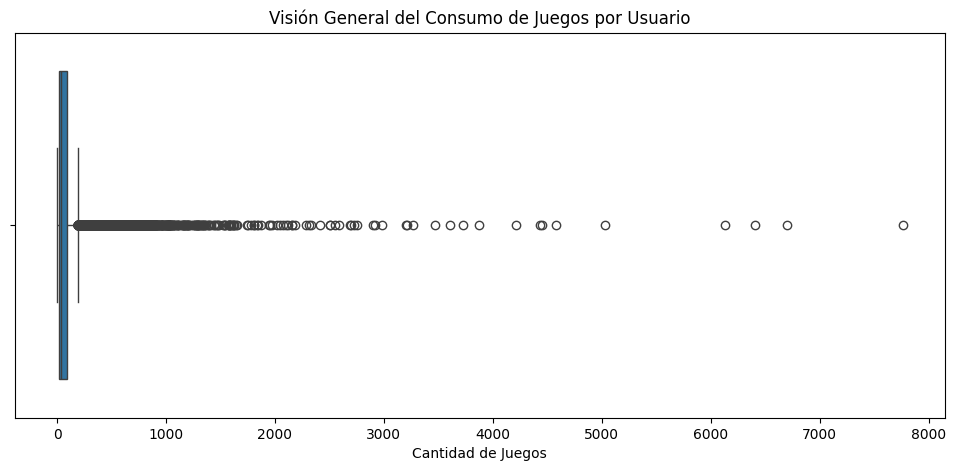

In [126]:
#Crearemos una gráfica para analizar la cantidad de juegos por usuario

#Creamos el dataset con el que vamos a trabajar
items_user = user_items.groupby('user_id')['items_count'].unique().explode()
items_user = pd.DataFrame(items_user)
items_user_count = items_user.sort_values('items_count', ascending=False)

plt.figure(figsize=(12, 5))

# Crea el boxplot
sns.boxplot(data=items_user_count, x='items_count')

# Personaliza el título y etiquetas de los ejes
plt.title('Visión General del Consumo de Juegos por Usuario')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('')

# Muestra el boxplot
plt.show()

In [127]:
items_user_count.head(10)

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
DeEggMeister,4576
76561198070585472,4456
Steamified,4432
rawrvixen,4212


Después de analizar la data podemos observar:

* **Distribución Sesgada Confirmada:** La mediana significativamente más baja que la media y cercana al primer cuartil valida la observación inicial de una distribución sesgada hacia la derecha. Esto indica que la mayoría de los usuarios tienen un consumo de juegos relativamente bajo, mientras que un pequeño número de usuarios tiene un consumo muy alto, lo que afecta el promedio general.

* **Importancia de Outliers:** El análisis de los 10 principales consumidores refuerza la presencia y el impacto de los valores atípicos en el conjunto de datos. Estos usuarios, con consumos que van desde 3,876 hasta 7,762 juegos, son casos extremos que distorsionan las medidas promedio hacia arriba y destacan la influencia de los superusuarios en la plataforma.

* **Concentración de Datos:** El corto "bigote" izquierdo y la caja concentrada en el extremo inferior indican que hay una gran cantidad de usuarios con un número de juegos por debajo de la media. Esto es un patrón común en las plataformas digitales donde una gran parte de los usuarios consume contenido de manera moderada.

* **Variabilidad en el Consumo Superior:** El "bigote" derecho más largo refleja una mayor variabilidad y un rango más amplio de consumo entre el 25% superior de los usuarios. Esto sugiere que dentro de los consumidores más activos hay una diversidad considerable en la cantidad de juegos consumidos.

* **Perfilamiento de Usuarios:** Los 10 usuarios con la mayor cantidad de juegos consumidos proporcionan un grupo de interés para el perfilamiento y la personalización de servicios. Estos superusuarios pueden tener patrones de consumo únicos, influir en las comunidades de juegos y ser clave para las estrategias de marketing dirigidas.

**¿Qué haremos?**

Crear un histograma de la cantidad de juegos consumidos y Distribución de Usuarios por Categoría de Consumo de Juegos para ver cómo se distribuyen.

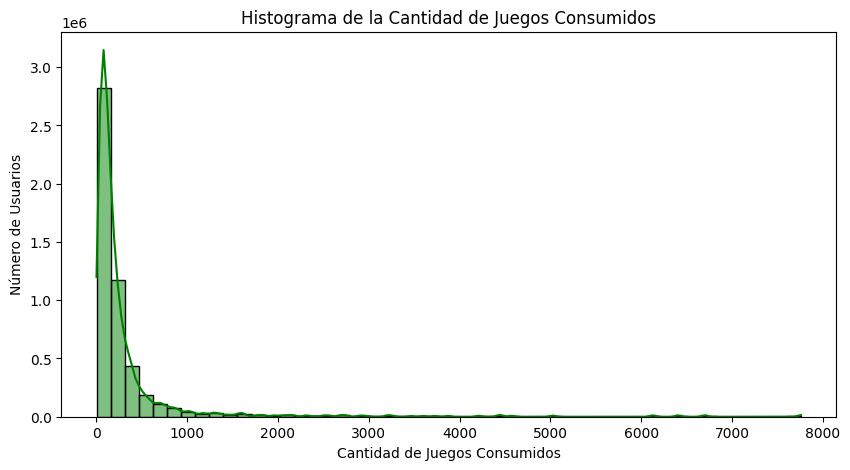

In [128]:
# Crear un histograma de la cantidad de juegos consumidos
plt.figure(figsize=(10, 5))
sns.histplot(user_items['items_count'], bins=50, kde=True, color='green')
plt.title('Histograma de la Cantidad de Juegos Consumidos')
plt.xlabel('Cantidad de Juegos Consumidos')
plt.ylabel('Número de Usuarios')
plt.show()

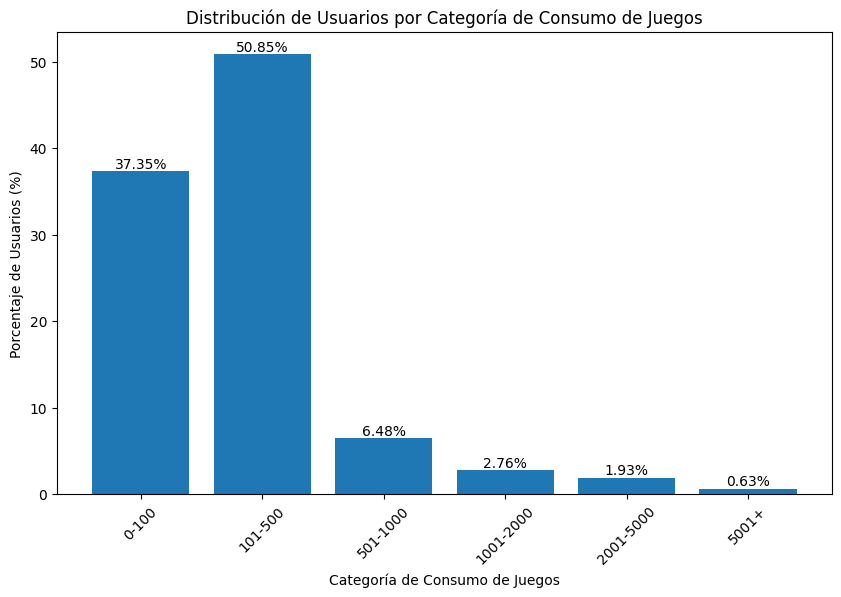

In [129]:
# Definir los límites para los intervalos de cantidad de juegos
game_bins = [0, 100, 500, 1000, 2000, 5000, 10000]
game_labels = ['0-100', '101-500', '501-1000', '1001-2000', '2001-5000', '5001+']

# Asignar a cada usuario un intervalo de cantidad de juegos consumidos
user_items['game_consumption_category'] = pd.cut(user_items['items_count'], bins=game_bins, labels=game_labels, include_lowest=True)

# Calcular la frecuencia de usuarios por categoría de consumo de juegos
user_category_counts = user_items['game_consumption_category'].value_counts().sort_index()

# Determinar los porcentajes de usuarios en cada categoría
user_category_percentages = (user_category_counts / user_category_counts.sum()) * 100

# Inicializar la visualización con un gráfico de barras
plt.figure(figsize=(10, 6))
category_bars = plt.bar(user_category_percentages.index, user_category_percentages)
plt.xlabel('Categoría de Consumo de Juegos')
plt.ylabel('Porcentaje de Usuarios (%)')
plt.title('Distribución de Usuarios por Categoría de Consumo de Juegos')
plt.xticks(rotation=45)

# Anotar cada barra con el porcentaje correspondiente
for bar, percentage in zip(category_bars, user_category_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()

Los gráficos presentan una distribución del consumo de juegos con la mayoría de los usuarios cayendo en los rangos inferiores de 0-500 juegos, destacando un patrón de uso moderado dentro de la comunidad de juegos. 
Un pequeño porcentaje de usuarios posee colecciones de más de 500 juegos, señalando la presencia de un grupo dedicado de superusuarios. Estos datos sugieren que mientras la mayoría se contenta con una cantidad limitada de juegos, hay una minoría que invierte significativamente más en su pasatiempo, posiblemente debido a una mayor pasión por los juegos, más tiempo disponible para jugar, o mayor capacidad económica para adquirir juegos. Estos hallazgos son cruciales para comprender la dinámica del mercado de juegos y pueden informar estrategias de marketing y desarrollo de productos dirigidas a diferentes segmentos de usuarios.

**Revisemos la columna playtime_forever_**

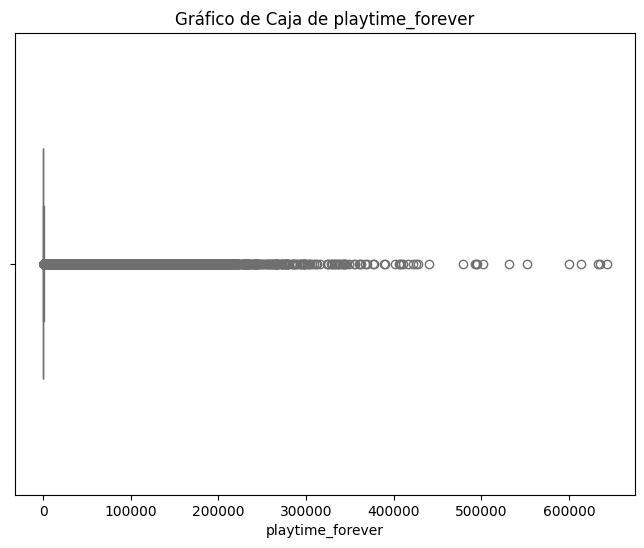

In [130]:
# Gráfico de caja para 'playtime_forever' en User_items
plt.figure(figsize=(8, 6))
sns.boxplot(x=user_items['playtime_forever'], orient='vertical', width=0.5, color='skyblue')
plt.title('Gráfico de Caja de playtime_forever')
plt.xlabel('playtime_forever')
plt.show()

El gráfico de caja muestra que la mayoría de los usuarios tiene un tiempo de juego relativamente bajo, con la mediana cercana al cuartil inferior. Existen varios valores atípicos que indican que hay usuarios con tiempos de juego excepcionalmente altos. Estos outliers podrían representar a jugadores muy activos o aquellos que dejan los juegos en funcionamiento por largos períodos. Por ello, vamos a revisar los valores atípicos.

In [131]:
# Calculamos los Q1 y Q3 a partir de los datos en horas
Q1 = np.percentile(user_items['playtime_forever'], 25)
Q3 = np.percentile(user_items['playtime_forever'], 75)

# Calculamos el IQR
IQR = Q3 - Q1

# Definimos el umbral para valores atípicos
umbral = 3 * IQR

# identificamos los valores atípicos
valores_atipicos = user_items[(user_items['playtime_forever'] < Q1 - umbral) | (user_items['playtime_forever'] > Q3 + umbral)]

#Imprimimos los resultados
valores_atipicos

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks,game_consumption_category
8,76561197970982479,277,300,Day of Defeat: Source,4733,0,101-500
9,76561197970982479,277,240,Counter-Strike: Source,1853,0,101-500
16,76561197970982479,277,6910,Deus Ex: Game of the Year Edition,2685,0,101-500
41,76561197970982479,277,17460,Mass Effect,1613,0,101-500
46,76561197970982479,277,1250,Killing Floor,10006,0,101-500
...,...,...,...,...,...,...,...
5093534,76561198312638244,36,362890,Black Mesa,2184,0,0-100
5093547,76561198313357718,7,730,Counter-Strike: Global Offensive,2317,0,0-100
5093548,POMFP0MF,1,730,Counter-Strike: Global Offensive,2987,0,0-100
5093567,76561198319916652,4,370240,NBA 2K16,1533,19,0-100


In [132]:
# Observamos los rangos
print("Rango del Q1:", Q1)
print("Rango del Q3:", Q3)
print("Rango IQR:", IQR)

Rango del Q1: 0.0
Rango del Q3: 355.0
Rango IQR: 355.0


El análisis revela que el tiempo de juego acumulado varía ampliamente, con un tercer cuartil en aproximadamente 5.92 horas. Utilizando el IQR, se han identificado outliers que podrían representar casos de uso intensivo o inusual. No obstante, la falta de anomalías flagrantes sugiere que los datos son consistentes con patrones de juego realistas. Se continúa con la evaluación utilizando Z-scores para una validación más rigurosa de los valores extremos en comparación con tendencias conocidas del dominio de videojuegos.

In [133]:
# Calcular el puntaje Z para cada valor de tiempo de juego
puntajes_z = np.abs(stats.zscore(user_items['playtime_forever']))

# Establecer un umbral alto para identificar valores extremos
umbral_extremo = 5

# Filtrar los registros que exceden el umbral de puntaje Z
registros_extremos = user_items[puntajes_z > umbral_extremo]

#Revisamos la tabla
registros_extremos

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks,game_consumption_category
1301,evcentric,137,466170,Idling to Rule the Gods,28545,1554,101-500
1354,Riot-Punch,328,12210,Grand Theft Auto IV,52062,0,101-500
2277,MinxIsBetterThanPotatoes,371,730,Counter-Strike: Global Offensive,74076,118,101-500
2696,NitemarePK,304,730,Counter-Strike: Global Offensive,32372,95,101-500
2823,NitemarePK,304,346900,AdVenture Capitalist,45058,0,101-500
...,...,...,...,...,...,...,...
5090676,SenpaiDemon,291,730,Counter-Strike: Global Offensive,36818,949,101-500
5090934,3214213216,107,730,Counter-Strike: Global Offensive,46248,0,101-500
5091127,nathanahtan,2,304930,Unturned,28379,1297,0-100
5091465,Haldirr,26,730,Counter-Strike: Global Offensive,34753,0,0-100


Tras un análisis riguroso de la variable playtime_forever, no se han detectado valores atípicos extremos que comprometan la calidad de los datos. A través de la aplicación de métodos estadísticos robustos, como el IQR y el Z-score con un umbral elevado, los datos han demostrado ser consistentes con un comportamiento de juego plausible. Por tanto, en lugar de descartar estos valores, se opta por retenerlos para preservar la integridad y riqueza de la información, que podría ser crucial para futuros análisis o modelos predictivos.

## **Análisis Exploratorio de Datos (EDA) del Conjunto "USER ITEMS"**

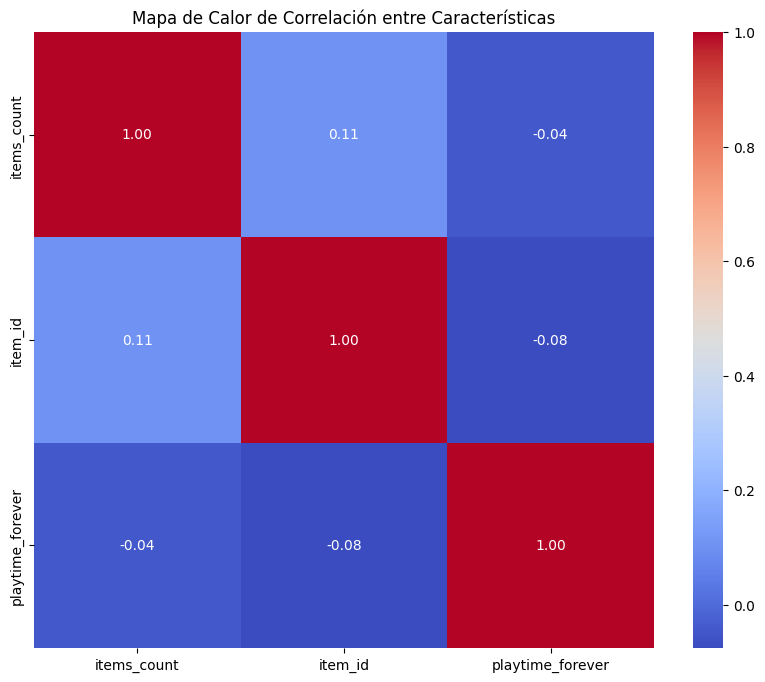

In [134]:
# Extracción de columnas con datos cuantitativos para análisis de correlación
datos_numericos = user_items[['items_count', 'item_id', 'playtime_forever']]

# Cálculo de la matriz de correlación para las columnas seleccionadas
matriz_correlacion = datos_numericos.corr()

# Visualización de la matriz de correlación a través de un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Características')
plt.show()

Puedo observar en el gráfico de correlación que no hay relaciones lineales fuertes entre las variables de conteo de ítems, identificadores de ítems y tiempo total de juego. Las correlaciones son todas menores a |0.1|, lo que implica que la variabilidad en una de estas métricas no se explica de manera significativa por la variabilidad en las otras. En términos de análisis de datos, esto significa que no podemos predecir el tiempo de juego basándonos en el número de ítems que un usuario posee o su ID de ítem, y viceversa. Estos hallazgos podrían sugerir la necesidad de investigar factores adicionales o más complejos que podrían influir en cómo los usuarios interactúan con los juegos en la plataforma.

Haremos una **matriz de correlación** con más datos de todas las tablas

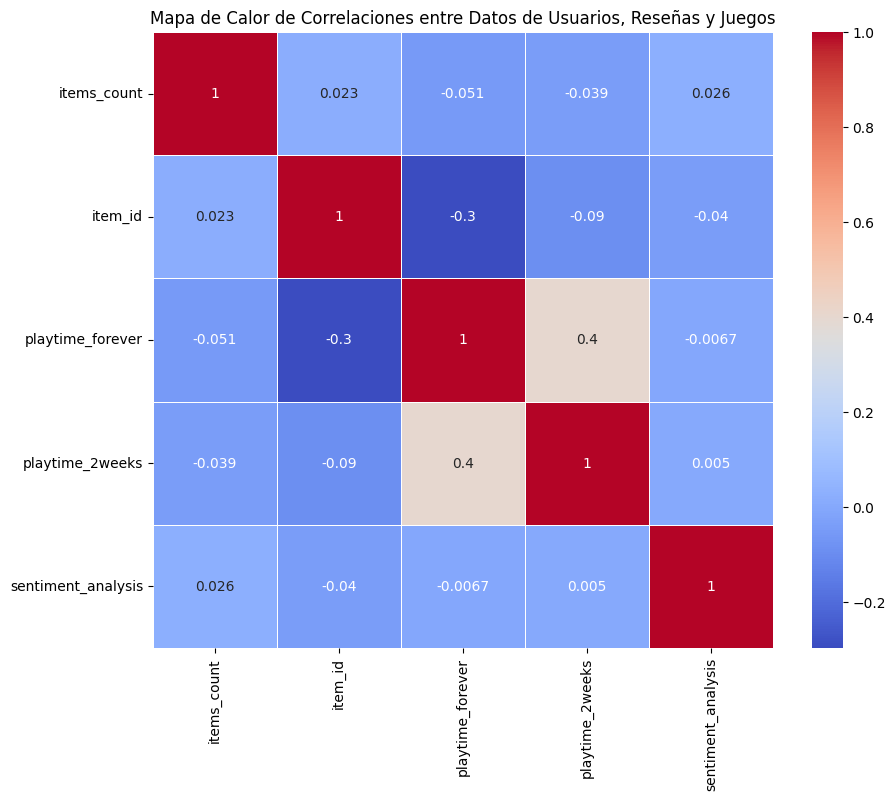

In [139]:
# renombramos "reviews_item_id" por "item_id"
user_reviews.rename(columns={'reviews_item_id': 'item_id'}, inplace=True)

# Realizamos el merge de los DataFrames usando 'user_id' y 'item_id' como claves
combined_df = pd.merge(user_items, user_reviews[['user_id', 'item_id', 'sentiment_analysis']], on=['user_id', 'item_id'])
combined_df = pd.merge(combined_df, steam_games[['item_id']], on='item_id')

# Seleccionamos solo las columnas numéricas para la matriz de correlación
numeric_columns = combined_df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación solo con las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Datos de Usuarios, Reseñas y Juegos')
plt.show()

No hay correlaciones fuertes entre las variables presentadas. La mayoría de los valores de correlación están cerca de cero, lo que indica una falta de relación lineal directa entre las variables. También podemos ver que:

* La variable item_id tiene una correlación negativa moderada con playtime_forever, lo que podría sugerir que ciertos juegos, posiblemente aquellos con identificadores más altos (que podrían ser títulos más recientes si item_id está basado en el tiempo), se juegan menos en términos de tiempo acumulado. Sin embargo, esta correlación sigue siendo relativamente débil.

* Playtime_forever y playtime_2weeks tienen una correlación positiva, lo que es esperado ya que si los usuarios juegan mucho un juego a largo plazo, también es probable que lo hayan jugado recientemente.

* Items_count y otras variables no muestran una relación significativa, lo que indica que la cantidad de juegos que posee un usuario no está fuertemente conectada con el tiempo que juega, el ID de los juegos que posee, o el análisis de sentimiento de las reseñas.

* La correlación entre playtime_2weeks y sentiment_analysis es prácticamente nula, sugiriendo que el tiempo de juego reciente y los sentimientos expresados en las reseñas no están relacionados

### **Análisis Exploratorio de Datos (EDA) del Conjunto "user_reviews"**

In [140]:
user_reviews.head()

,user_id,item_id,reviews_recommend,sentiment_analysis,reviews_year
0,76561197970982479,1250.0,True,2,2011
1,js41637,251610.0,True,2,2014
2,evcentric,248820.0,True,2,Dato no disponible
3,doctr,250320.0,True,2,2013
4,maplemage,211420.0,True,1,2014


**Revisión de datos faltantes/nulos**

In [141]:
user_reviews.isnull().sum()

user_id                  0
item_id               6548
reviews_recommend     6548
sentiment_analysis       0
reviews_year             0
dtype: int64

Item_id y reviews_recommend tiene la misma cantidad de nulos, vamos a revisar si son las mismas filas

In [144]:
# Dataframe de valores nulos en la columna 'item_id'
nulos_item_id = user_reviews['item_id'].isnull()

# Dataframe de nulos en la columna 'reviews_recommend'
nulos_reviews_recommend = user_reviews['reviews_recommend'].isnull()

# Ahora, para saber si son los mismos, comparamos las dos series de booleanos
nulos_comunes = nulos_item_id & nulos_reviews_recommend

# Creamos DataFrames para mostrar los resultados
nulos_item_id_df = pd.DataFrame(nulos_item_id)
nulos_reviews_recommend_df = pd.DataFrame(nulos_reviews_recommend)
nulos_comunes_df = pd.DataFrame(nulos_comunes)

# Calculamos el total de nulos y el total de nulos comunes
total_nulos_item_id = nulos_item_id.sum()
total_nulos_reviews_recommend = nulos_reviews_recommend.sum()
total_nulos_comunes = nulos_comunes.sum()

total_nulos_comunes

6548

Podemos concluir que son las mismas filas, las que tienen valores faltantes tanto en 'item_id' y 'reviews_recommend'

**Valores Duplicados**

In [151]:
# Verificar duplicados en el DataFrame user_reviews
duplicados_reviews = user_reviews.duplicated()
duplicados_user_reviews = user_reviews[user_reviews.duplicated(keep=False)]
duplicados_user_reviews


,user_id,item_id,reviews_recommend,sentiment_analysis,reviews_year
1624,76561198080824028,208090.0,True,2,2014
3589,bl00dlock,730.0,True,1,2015
4230,76561198061294635,440.0,True,2,2014
4301,SpiderTheLoko,8870.0,True,2,2014
4385,76561197999539608,440.0,True,2,2014
6210,qwertybmwh1994,1250.0,True,1,2013
6860,flippy12343,4000.0,True,2,2014
7189,76561198057905001,730.0,True,2,2015
9293,HenezRS,730.0,True,2,2014
10965,76561198068952127,730.0,True,2,2015


In [150]:
# Contar el número de duplicados
total_duplicados = duplicados_reviews.sum()

# Para ver cuántos duplicados hay
print(f"Total de filas duplicadas en user_reviews: {total_duplicados}")

# Si deseas ver las filas duplicadas
filas_duplicadas = user_reviews[user_reviews.duplicated(keep=False)]

Total de filas duplicadas en user_reviews: 27


In [152]:
user_reviews = user_reviews.drop_duplicates(keep='first')

**Revisión de tipos de datos**

In [154]:
user_reviews.dtypes

user_id                object
item_id               float64
reviews_recommend      object
sentiment_analysis      int64
reviews_year           object
dtype: object

In [160]:
# Convertir valores no numéricos a NaN y luego a entero
user_reviews['reviews_year'] = pd.to_numeric(user_reviews['reviews_year'], errors='coerce')

# Convertir 'reviews_year' a integer (int)
user_reviews['reviews_year'] = user_reviews['reviews_year'].fillna(0).astype(int)

# Convertir 'item_id' a integer (int), manejando los valores NaN
user_reviews['item_id'] = user_reviews['item_id'].fillna(0).astype(int)

# Convertir 'reviews_recommend' a boolean (bool), asumiendo que ya contiene 'True' y 'False'
user_reviews['reviews_recommend'] = user_reviews['reviews_recommend'].astype(bool)

# Mostrar los tipos de datos para confirmar los cambios
user_reviews.dtypes

user_id               object
item_id                int32
reviews_recommend       bool
sentiment_analysis     int64
reviews_year           int32
dtype: object

**Análisis estadísticos y correlaciones**

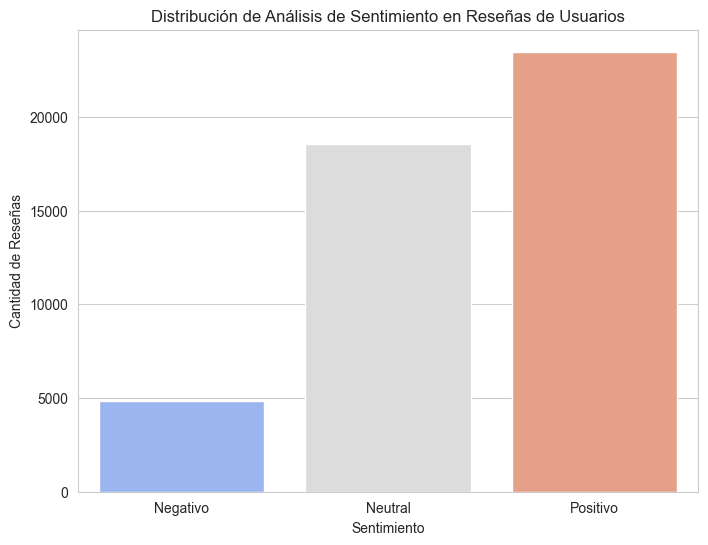

In [162]:
# Crear un gráfico de barras que muestra la distribución de análisis de sentimiento
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(data=user_reviews, x='sentiment_analysis', palette='coolwarm')
plt.title('Distribución de Análisis de Sentimiento en Reseñas de Usuarios')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo'])
plt.show()

La mayoría de las reseñas de usuarios analizadas son positivas, seguidas por una cantidad significativamente menor de reseñas neutrales y aún menos reseñas negativas.

### **Selección de Variables para la creación del Modelo de Aprendizaje**
En nuestro proyecto de desarrollo de un modelo de recomendación de juegos, utilizaremos un enfoque preciso para calcular una puntuación de recomendación en una escala del 1 al 5, considerando el análisis de sentimiento de las reseñas y las recomendaciones de usuarios. Esta puntuación permite ofrecer recomendaciones personalizadas y precisas a nuestros usuarios, teniendo en cuenta la calidad percibida y las preferencias de la comunidad.

La función que estamos desarrollando desempeña un papel esencial en nuestro sistema de recomendación de juegos, asignando calificaciones del 1 al 5 a cada juego mediante el análisis de sentimientos y las recomendaciones de los usuarios, proporcionando así recomendaciones personalizadas y precisas.

In [168]:
def calcular_calificacion(row):
    '''
    Calcula una calificación en base al análisis de sentimientos de las reseñas de los juegos 
    y si los usuarios recomiendan o no dichos juegos.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
       - "sentiment_analysis" (int): La valoración numérica del análisis de sentimientos (0, 1 o 2).
       - "reviews_recommendn" (bool): Un valor booleano que indica si las reseñas recomiendan el juego o no.

    Devuelve:
       int o None: Un número entero entre 1 y 5 que representa la calificación calculada, 
       o None en caso de que las entradas no sean válidas.
    '''
    # Inicio del proceso de asignación de calificaciones 
    if row["sentiment_analysis"] == 0 and not row["reviews_recommend"]:
        return 1  # Calificación 1: Sentimiento negativo y no recomendado
    elif row["sentiment_analysis"] == 0 and row["reviews_recommend"]:
        return 1  # Calificación 1: Sentimiento negativo y recomendado (coherencia)
    elif row["sentiment_analysis"] == 1 and not row["reviews_recommend"]:
        return 2  # Calificación 2: Sentimiento neutral y no recomendado
    elif row["sentiment_analysis"] == 1 and row["reviews_recommend"]:
        return 3  # Calificación 3: Sentimiento neutral pero recomendado
    elif row["sentiment_analysis"] == 2 and not row["reviews_recommend"]:
        return 4  # Calificación 4: Sentimiento positivo pero no recomendado
    elif row["sentiment_analysis"] == 2 and row["reviews_recommend"]:
        return 5  # Calificación 5: Sentimiento positivo y recomendado
    else:
        return None  # Entradas inválidas, no se puede calcular una calificación

Agregamos la columna "recomendacion"

In [174]:
user_reviews['recomendacion'] = user_reviews.apply(calcular_calificacion, axis=1)
user_reviews.head()

,user_id,item_id,reviews_recommend,sentiment_analysis,reviews_year,recommendacion,recomendacion
0,76561197970982479,1250,True,2,2011,5,5
1,js41637,251610,True,2,2014,5,5
2,evcentric,248820,True,2,0,5,5
3,doctr,250320,True,2,2013,5,5
4,maplemage,211420,True,1,2014,3,3


In [173]:
user_reviews_filtered = user_reviews[['user_id', 'item_id', 'recomendacion']]
user_reviews_filtered.head()

,user_id,item_id,recomendacion
0,76561197970982479,1250,5
1,js41637,251610,5
2,evcentric,248820,5
3,doctr,250320,5
4,maplemage,211420,3


In [176]:
# Creamos un nuevo DataFrame con valores únicos de 'item_id' y 'item_name'
unicos_items = user_items[['item_id', 'item_name']].drop_duplicates()
unicos_items.head()

,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


In [180]:
# Realizamos un merge de unicos_items y user_reviews_filtered usando 'item_id'
merged_data1 = user_reviews_filtered.merge(unicos_items, on='item_id')
merged_data1.head()

,user_id,item_id,recomendacion,item_name
0,76561197970982479,1250,5,Killing Floor
1,76561198090899557,1250,1,Killing Floor
2,2ik4tf,1250,5,Killing Floor
3,Delicous_Cookies,1250,5,Killing Floor
4,Killerkalf,1250,5,Killing Floor


In [181]:
merged_data1.isnull().sum()

user_id          0
item_id          0
recomendacion    0
item_name        0
dtype: int64

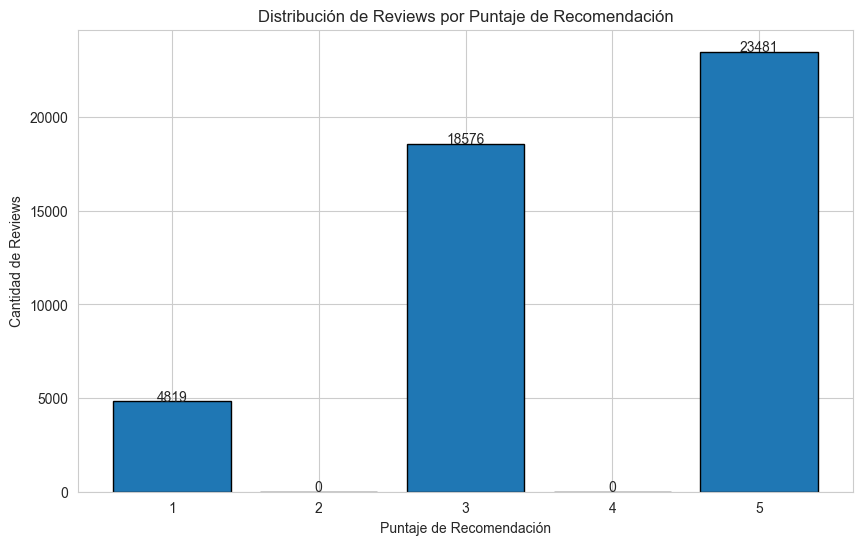

In [183]:
# Generamos un histograma de la cantidad de reviews por puntaje de recomendación
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(user_reviews_filtered['recomendacion'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, edgecolor='black')

# Agregamos las etiquetas y el título
plt.xlabel('Puntaje de Recomendación')
plt.ylabel('Cantidad de Reviews')
plt.title('Distribución de Reviews por Puntaje de Recomendación')

# Ponemos la cantidad de reviews en la parte superior de cada barra
for i, rect in enumerate(patches):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 10, f'{int(n[i])}', ha='center')

# Mostrar el gráfico
plt.show()


La ausencia de reseñas con calificaciones 2 y 4 en el gráfico refleja la metodología de calificación, la cual no contempla estos puntajes dado que todas las reseñas positivas son recomendadas (calificación 5) y las neutrales se dividen entre recomendadas (calificación 3) y no recomendadas (calificación 2). Esto indica que los usuarios tienden a recomendar juegos cuando tienen sentimientos positivos y se dividen en sus recomendaciones cuando tienen sentimientos neutros.

In [184]:
#Guardar la data para el modelo de recomendación
nombre_archivo = 'modelo_recomendacion.csv'

# Guardar el DataFrame en el archivo CSV
merged_data1.to_csv("modelo_recomendacion.csv", index=False, encoding='utf-8')
print(f'Se ha guardado el archivo {nombre_archivo} en la misma carpeta.')

Se ha guardado el archivo modelo_recomendacion.csv en la misma carpeta.


In [186]:
archivo_parquet= 'data\modelo_recomendacion.parquet'

# Guardar el DataFrame en archivo Parquet
merged_data1.to_parquet("data\modelo_recomendacion.parquet")
print(f'Se ha guardado el archivo {archivo_parquet} en la carpeta data.')

Se ha guardado el archivo data\modelo_recomendacion.parquet en la carpeta data.
